# GCaMP6f fluorescence traces Simulation

### Objective
Simulate GCaMP6f fluorescence traces and apply calibration and normalization to them.

### Signals
470, 405, and 590

### Experience
- Continuous trace: Keep the fiber consistently close to the fluorophore.
- Discrete traces: Repeatedly move the fiber closer to and away from the fluorophore.

##### Import Packages

In [2]:
import cv2 
import os
import numpy as np
import matplotlib.pyplot as plt
import datetime
import pandas as pd
import seaborn as sns
from scipy.stats import zscore

##### Experiment setting and utility functions

In [3]:
IMAGE_FOLDER = './data/'
CSV_FILENAME = "experiment_data.csv"
PLOT_DATA = True
SAVE_TO_CSV = True
SELECT_RANGE = False
START = 100
END = 200

#figure setting
linewidth = 3

In [4]:
def data_processing(test):
    image_folder = IMAGE_FOLDER+test
    dic = {"time_405":[],"time_470":[],"time_590":[],"intensity_405":[],"intensity_470":[],"intensity_590":[]}
    i = 0
    for file in os.listdir(image_folder):
        if file.endswith(".jpg"):
            date_string = file[4:-4]
            format_string = "%y-%m-%d_%H-%M-%S-%f"
            datetime_obj = datetime.datetime.strptime(date_string, format_string)
            img = cv2.imread(os.path.join(image_folder, file))
            intensity = np.sum(img)
            if i % 3 == 0:
                dic["time_405"].append(datetime_obj)
                dic["intensity_405"].append(intensity)
            elif i % 3 == 1:
                dic["time_470"].append(datetime_obj)
                dic["intensity_470"].append(intensity)
            else:
                dic["time_590"].append(datetime_obj)
                dic["intensity_590"].append(intensity)
            i+=1
    dic_len = min(len(dic['time_405']),len(dic['time_470']),len(dic['time_590']))
    dic['time_405'] = dic['time_405'][:dic_len]
    dic['intensity_405'] = dic['intensity_405'][:dic_len]
    dic['time_470'] = dic['time_470'][:dic_len]
    dic['intensity_470'] = dic['intensity_470'][:dic_len]
    df=pd.DataFrame(dic).astype({'intensity_405': 'float','intensity_470': 'float'})
    if SELECT_RANGE:
        df = df.iloc[START:END,:]
    df["calibrated_470"] = df["intensity_470"]-df["intensity_405"]
    df["normalized_470"] = zscore(df["calibrated_470"])
    std = df.std()
    std_df = pd.DataFrame(std[["intensity_405","intensity_470","calibrated_470", "normalized_470"]]).T.rename(index={0: 'standard deviation'})
    df_std = pd.concat([df, std_df])
    display(pd.concat([df_std.iloc[80:90,:], df_std.tail(1)]))
    return df

def signal_plot(df):
    fig, ax = plt.subplots(figsize=(25,4))
    sns.lineplot(x='time_405', y='intensity_405', data=df, ax=ax, label='raw_405', linewidth = linewidth)
    sns.lineplot(x='time_470', y='intensity_470', data=df, ax=ax, label='raw_470', linewidth = linewidth)
    sns.lineplot(x='time_590', y='intensity_590', data=df, ax=ax, label='raw_590', linewidth = linewidth)
    sns.lineplot(x='time_470', y='calibrated_470', data=df, ax=ax, label='calibrated_470', linewidth = linewidth)
    # sns.lineplot(x='time_470', y='normalized_470', data=df, ax=ax, label='470')
    ax.set_title('Fluorescence of LED')
    ax.set_xlabel('Time')
    ax.set_ylabel('intensity')
    ax.legend()

    plt.show()

##### Continuous trace

,time_405,time_470,time_590,intensity_405,intensity_470,intensity_590,calibrated_470,normalized_470
80,2023-04-19 18:33:41.138095,2023-04-19 18:33:41.204501,2023-04-19 18:33:41.270906,1662996.0,3879249.0,559134.0,2216253.0,0.125175
81,2023-04-19 18:33:41.337311,2023-04-19 18:33:41.404693,2023-04-19 18:33:41.471099,1661172.0,3888378.0,559104.0,2227206.0,0.146092
82,2023-04-19 18:33:41.539460,2023-04-19 18:33:41.604888,2023-04-19 18:33:41.670315,1665366.0,3888690.0,559104.0,2223324.0,0.138679
83,2023-04-19 18:33:41.737698,2023-04-19 18:33:41.804102,2023-04-19 18:33:41.870508,1660875.0,3889386.0,559104.0,2228511.0,0.148584
84,2023-04-19 18:33:41.937892,2023-04-19 18:33:42.004296,2023-04-19 18:33:42.071681,1658751.0,3890346.0,559134.0,2231595.0,0.154474
85,2023-04-19 18:33:42.138085,2023-04-19 18:33:42.244530,2023-04-19 18:33:42.273826,1666851.0,3855744.0,559140.0,2188893.0,0.072927
86,2023-04-19 18:33:42.338278,2023-04-19 18:33:42.404684,2023-04-19 18:33:42.472066,1563597.0,2174868.0,559140.0,611271.0,-2.939815
87,2023-04-19 18:33:42.538472,2023-04-19 18:33:42.605855,2023-04-19 18:33:42.671282,1568229.0,2182734.0,559104.0,614505.0,-2.93364
88,2023-04-19 18:33:42.738667,2023-04-19 18:33:42.805070,2023-04-19 18:33:42.871474,1572927.0,2182026.0,558978.0,609099.0,-2.943963
89,2023-04-19 18:33:42.938857,2023-04-19 18:33:43.005263,2023-04-19 18:33:43.071669,1570368.0,2180484.0,559134.0,610116.0,-2.942021


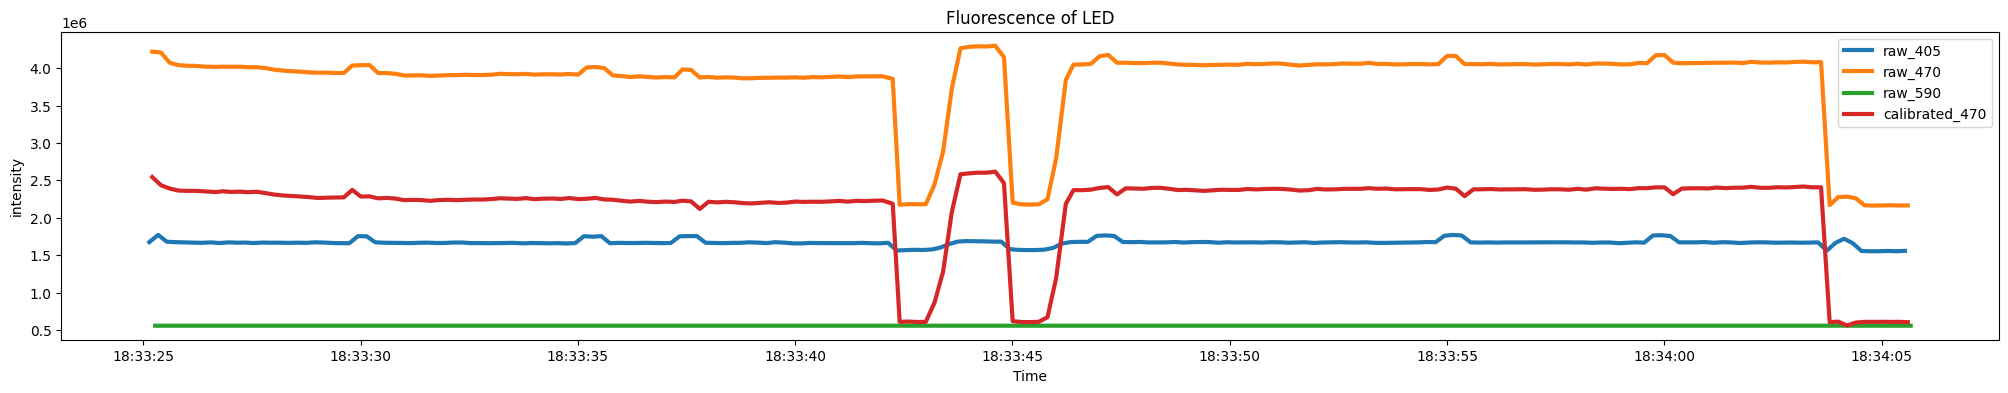

In [8]:
df = data_processing("test1_continuous")
signal_plot(df)

,time_405,time_470,time_590,intensity_405,intensity_470,intensity_590,calibrated_470,normalized_470
80,2023-04-26 15:56:41.726673,2023-04-26 15:56:41.794055,2023-04-26 15:56:41.860457,2121414.0,3733368.0,336912.0,1611954.0,0.055939
81,2023-04-26 15:56:41.926861,2023-04-26 15:56:41.993267,2023-04-26 15:56:42.059675,2118507.0,3734358.0,335622.0,1615851.0,0.157353
82,2023-04-26 15:56:42.127055,2023-04-26 15:56:42.193462,2023-04-26 15:56:42.261820,2040306.0,3655209.0,329658.0,1614903.0,0.132683
83,2023-04-26 15:56:42.328231,2023-04-26 15:56:42.394630,2023-04-26 15:56:42.460058,2041554.0,3657432.0,329646.0,1615878.0,0.158056
84,2023-04-26 15:56:42.526464,2023-04-26 15:56:42.593847,2023-04-26 15:56:42.662205,2038077.0,3650601.0,329658.0,1612524.0,0.070773
85,2023-04-26 15:56:42.727634,2023-04-26 15:56:42.793062,2023-04-26 15:56:42.863375,2039211.0,3655188.0,329616.0,1615977.0,0.160632
86,2023-04-26 15:56:42.927827,2023-04-26 15:56:42.996187,2023-04-26 15:56:43.060639,2041389.0,3657378.0,329646.0,1615989.0,0.160945
87,2023-04-26 15:56:43.128020,2023-04-26 15:56:43.193449,2023-04-26 15:56:43.259853,2039583.0,3657156.0,329646.0,1617573.0,0.202166
88,2023-04-26 15:56:43.326258,2023-04-26 15:56:43.393640,2023-04-26 15:56:43.460046,2041206.0,3668001.0,329673.0,1626795.0,0.442156
89,2023-04-26 15:56:43.527429,2023-04-26 15:56:43.595790,2023-04-26 15:56:43.661217,2041797.0,3658056.0,329616.0,1616259.0,0.167971


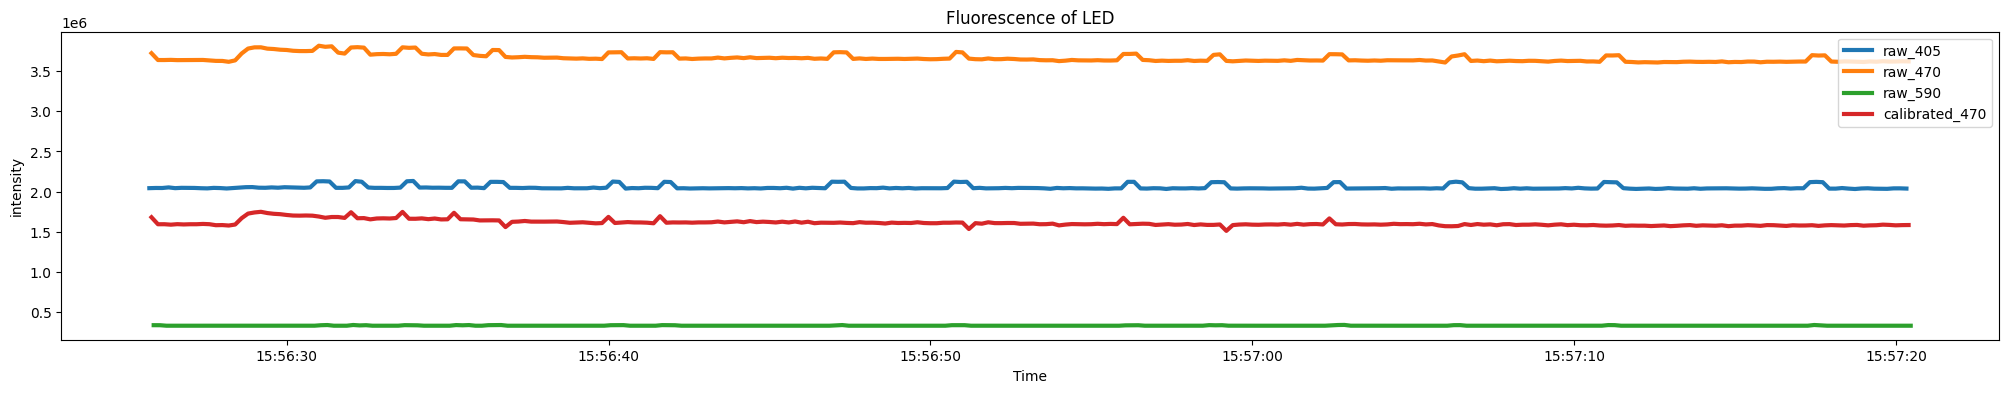

In [5]:
df = data_processing("test2_continuous")
signal_plot(df)

,time_405,time_470,time_590,intensity_405,intensity_470,intensity_590,calibrated_470,normalized_470
80,2023-04-26 16:07:21.887773,2023-04-26 16:07:21.954179,2023-04-26 16:07:22.024491,1313136.0,3040284.0,224388.0,1727148.0,0.585801
81,2023-04-26 16:07:22.089922,2023-04-26 16:07:22.155349,2023-04-26 16:07:22.222730,1312272.0,3040125.0,224388.0,1727853.0,0.597493
82,2023-04-26 16:07:22.289137,2023-04-26 16:07:22.354563,2023-04-26 16:07:22.421947,1310760.0,3047694.0,224388.0,1736934.0,0.748096
83,2023-04-26 16:07:22.488351,2023-04-26 16:07:22.553779,2023-04-26 16:07:22.621161,1307946.0,3048390.0,224388.0,1740444.0,0.806308
84,2023-04-26 16:07:22.689521,2023-04-26 16:07:22.756902,2023-04-26 16:07:22.834052,1307190.0,3046545.0,224388.0,1739355.0,0.788247
85,2023-04-26 16:07:22.893623,2023-04-26 16:07:22.956120,2023-04-26 16:07:23.021551,1308591.0,3052326.0,224388.0,1743735.0,0.860887
86,2023-04-26 16:07:23.087952,2023-04-26 16:07:23.154360,2023-04-26 16:07:23.220763,1312356.0,3050478.0,224388.0,1738122.0,0.767799
87,2023-04-26 16:07:23.288149,2023-04-26 16:07:23.355529,2023-04-26 16:07:23.425841,1309464.0,3056451.0,224388.0,1746987.0,0.914819
88,2023-04-26 16:07:23.488345,2023-04-26 16:07:23.554744,2023-04-26 16:07:23.621152,1311588.0,3055032.0,224580.0,1743444.0,0.856061
89,2023-04-26 16:07:23.687556,2023-04-26 16:07:23.754939,2023-04-26 16:07:23.821343,1313961.0,3053616.0,224580.0,1739655.0,0.793223


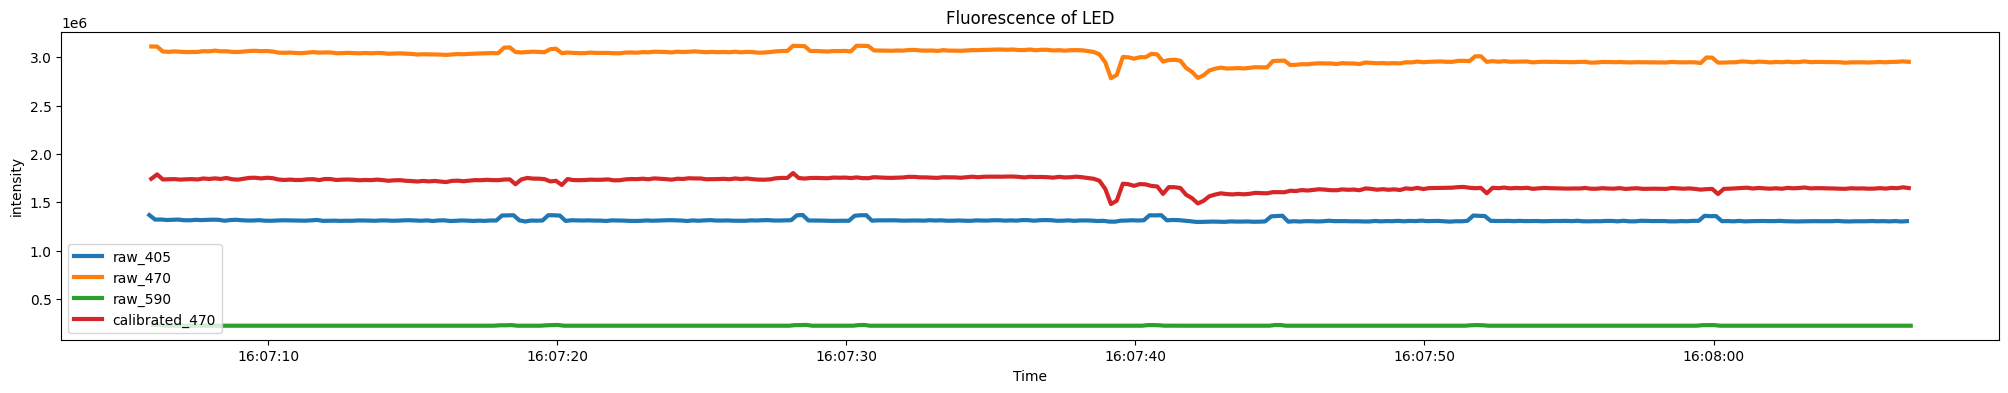

In [10]:
df = data_processing("test3_continuous")
signal_plot(df)

,time_405,time_470,time_590,intensity_405,intensity_470,intensity_590,calibrated_470,normalized_470
80,2023-04-26 16:11:51.311207,2023-04-26 16:11:51.377612,2023-04-26 16:11:51.444018,1037574.0,2155752.0,181968.0,1118178.0,-1.310957
81,2023-04-26 16:11:51.514332,2023-04-26 16:11:51.578784,2023-04-26 16:11:51.650073,1040622.0,2188098.0,180624.0,1147476.0,-1.143713
82,2023-04-26 16:11:51.711593,2023-04-26 16:11:51.784836,2023-04-26 16:11:51.844405,1041969.0,2188803.0,181392.0,1146834.0,-1.147377
83,2023-04-26 16:11:51.910809,2023-04-26 16:11:51.978191,2023-04-26 16:11:52.044599,1038201.0,2195109.0,183696.0,1156908.0,-1.089871
84,2023-04-26 16:11:52.111003,2023-04-26 16:11:52.178385,2023-04-26 16:11:52.244793,1041519.0,2208672.0,179280.0,1167153.0,-1.031388
85,2023-04-26 16:11:52.312173,2023-04-26 16:11:52.385413,2023-04-26 16:11:52.445961,1044948.0,2218503.0,183696.0,1173555.0,-0.994843
86,2023-04-26 16:11:52.512366,2023-04-26 16:11:52.577795,2023-04-26 16:11:52.645177,1045392.0,2218701.0,182160.0,1173309.0,-0.996248
87,2023-04-26 16:11:52.710605,2023-04-26 16:11:52.777010,2023-04-26 16:11:52.846347,1042362.0,2235720.0,180624.0,1193358.0,-0.8818
88,2023-04-26 16:11:52.911777,2023-04-26 16:11:52.983064,2023-04-26 16:11:53.052398,1043346.0,2243151.0,181584.0,1199805.0,-0.844998
89,2023-04-26 16:11:53.118802,2023-04-26 16:11:53.179350,2023-04-26 16:11:53.245756,1043427.0,2246385.0,179280.0,1202958.0,-0.826999


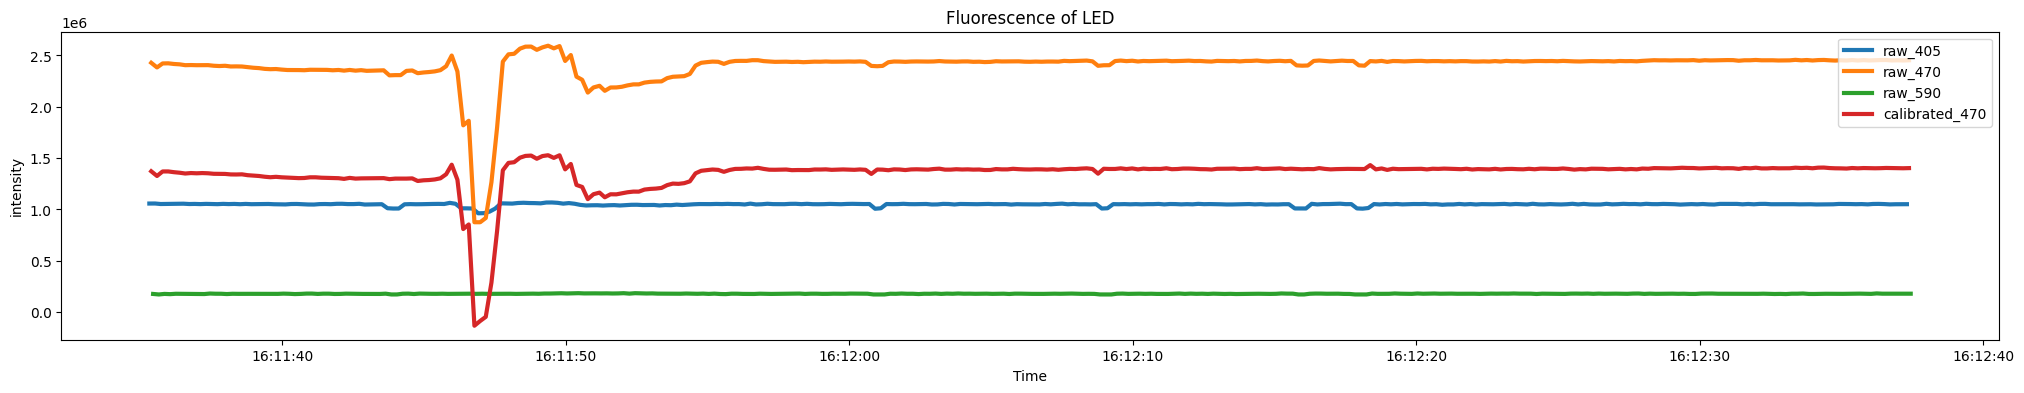

In [11]:
df = data_processing("test4_continuous")
signal_plot(df)

,time_405,time_470,time_590,intensity_405,intensity_470,intensity_590,calibrated_470,normalized_470
80,2023-04-26 16:31:48.879144,2023-04-26 16:31:48.943596,2023-04-26 16:31:49.010978,1517430.0,2980245.0,253848.0,1462815.0,0.42479
81,2023-04-26 16:31:49.077385,2023-04-26 16:31:49.143789,2023-04-26 16:31:49.210193,1515639.0,2973081.0,251952.0,1457442.0,0.333778
82,2023-04-26 16:31:49.277576,2023-04-26 16:31:49.343981,2023-04-26 16:31:49.410387,1517481.0,2970093.0,250902.0,1452612.0,0.251963
83,2023-04-26 16:31:49.476792,2023-04-26 16:31:49.543195,2023-04-26 16:31:49.613510,1519812.0,2969976.0,252300.0,1450164.0,0.210497
84,2023-04-26 16:31:49.677960,2023-04-26 16:31:49.748273,2023-04-26 16:31:49.810772,1520394.0,2963412.0,251142.0,1443018.0,0.089452
85,2023-04-26 16:31:49.877176,2023-04-26 16:31:49.943582,2023-04-26 16:31:50.010967,1519341.0,2965164.0,252726.0,1445823.0,0.136965
86,2023-04-26 16:31:50.077372,2023-04-26 16:31:50.144751,2023-04-26 16:31:50.211157,1520580.0,2969964.0,256176.0,1449384.0,0.197284
87,2023-04-26 16:31:50.276586,2023-04-26 16:31:50.344945,2023-04-26 16:31:50.417700,1517355.0,2965053.0,250572.0,1447698.0,0.168725
88,2023-04-26 16:31:50.477267,2023-04-26 16:31:50.544650,2023-04-26 16:31:50.610078,1518948.0,2961765.0,251958.0,1442817.0,0.086047
89,2023-04-26 16:31:50.677459,2023-04-26 16:31:50.743864,2023-04-26 16:31:50.810269,1513134.0,2965164.0,249978.0,1452030.0,0.242105


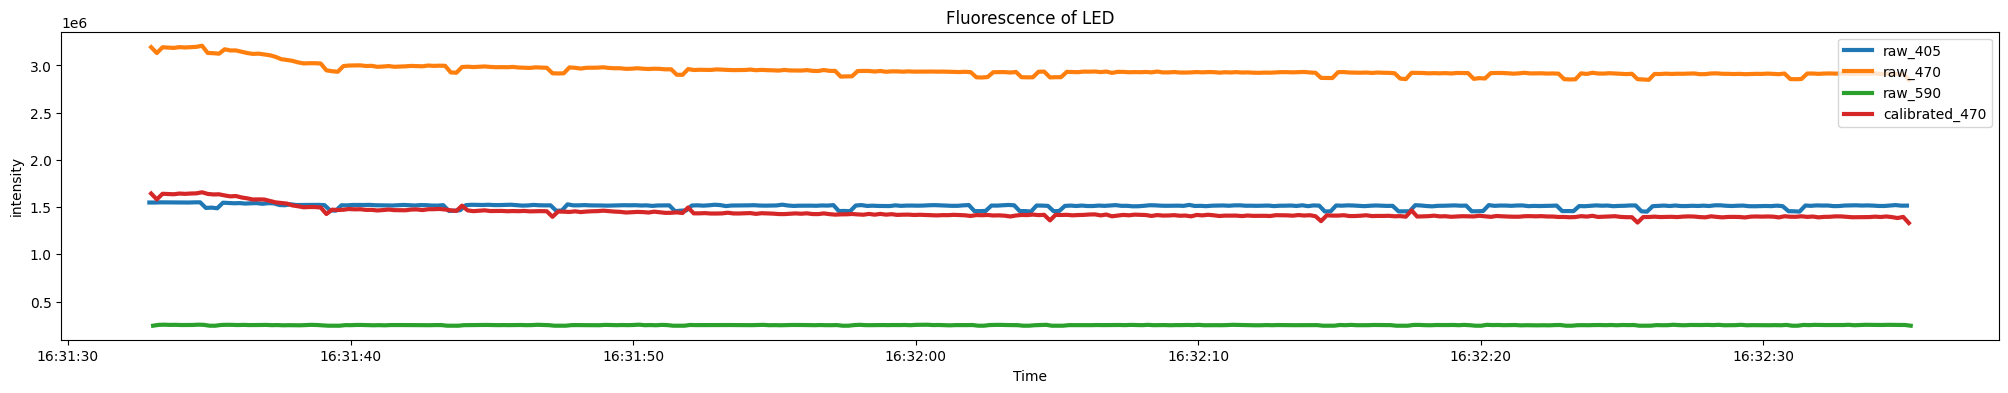

In [12]:
df = data_processing("test9_continuous")
signal_plot(df)

##### Discreat trace

,time_405,time_470,time_590,intensity_405,intensity_470,intensity_590,calibrated_470,normalized_470
80,2023-04-26 16:16:21.413889,2023-04-26 16:16:21.479318,2023-04-26 16:16:21.548652,1300830.0,2987727.0,209304.0,1686897.0,0.809253
81,2023-04-26 16:16:21.614081,2023-04-26 16:16:21.682439,2023-04-26 16:16:21.749822,1295370.0,2987646.0,208728.0,1692276.0,0.818069
82,2023-04-26 16:16:21.813297,2023-04-26 16:16:21.880679,2023-04-26 16:16:21.948065,1294659.0,2983899.0,208704.0,1689240.0,0.813093
83,2023-04-26 16:16:22.013488,2023-04-26 16:16:22.079894,2023-04-26 16:16:22.144346,1294680.0,2774166.0,209496.0,1479486.0,0.469306
84,2023-04-26 16:16:22.217588,2023-04-26 16:16:22.288876,2023-04-26 16:16:22.352353,1204965.0,1319667.0,207000.0,114702.0,-1.767581
85,2023-04-26 16:16:22.416804,2023-04-26 16:16:22.487118,2023-04-26 16:16:22.549617,1152810.0,1186647.0,207000.0,33837.0,-1.900119
86,2023-04-26 16:16:22.612115,2023-04-26 16:16:22.679498,2023-04-26 16:16:22.744924,1150098.0,1187688.0,206976.0,37590.0,-1.893968
87,2023-04-26 16:16:22.812307,2023-04-26 16:16:22.880667,2023-04-26 16:16:22.949024,1192245.0,2617728.0,209880.0,1425483.0,0.380795
88,2023-04-26 16:16:23.035938,2023-04-26 16:16:23.082811,2023-04-26 16:16:23.149220,1294374.0,2915829.0,208344.0,1621455.0,0.701993
89,2023-04-26 16:16:23.220506,2023-04-26 16:16:23.286910,2023-04-26 16:16:23.345506,1293693.0,2895945.0,208530.0,1602252.0,0.67052


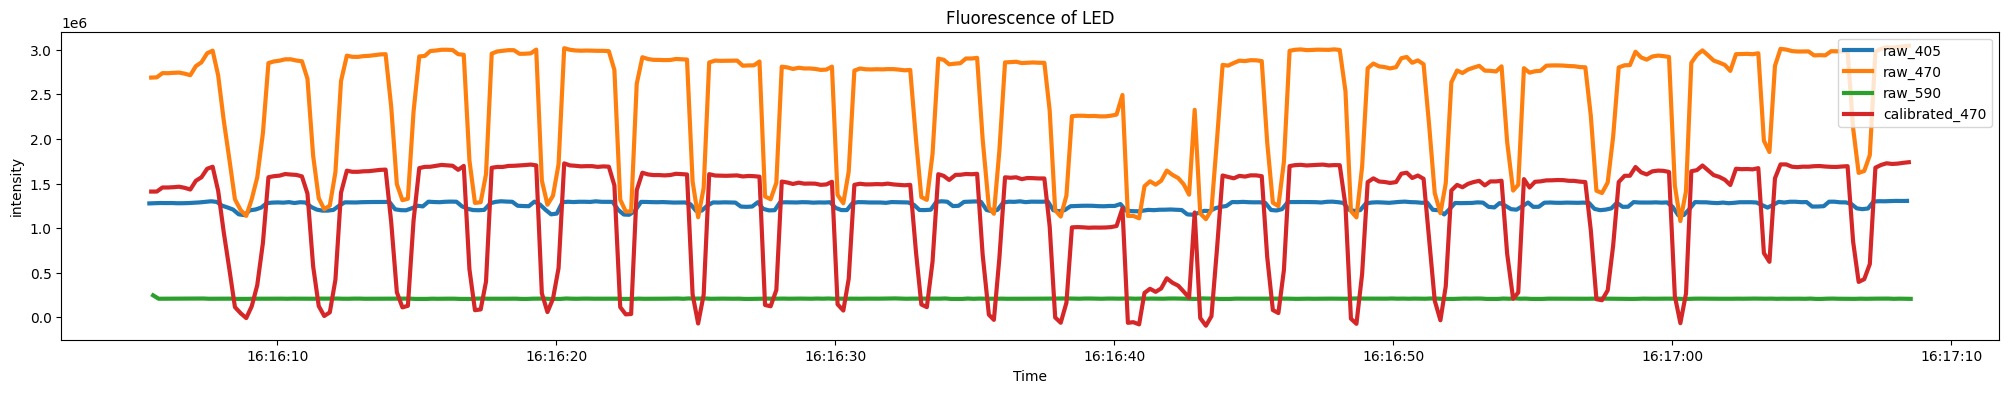

In [13]:
df = data_processing("test5_discreated")
signal_plot(df)

,time_405,time_470,time_590,intensity_405,intensity_470,intensity_590,calibrated_470,normalized_470
80,2023-04-26 16:20:45.878414,2023-04-26 16:20:45.944818,2023-04-26 16:20:46.013178,1195029.0,1094520.0,213696.0,-100509.0,-1.182635
81,2023-04-26 16:20:46.078608,2023-04-26 16:20:46.145013,2023-04-26 16:20:46.214350,1190814.0,1088724.0,214464.0,-102090.0,-1.184577
82,2023-04-26 16:20:46.281730,2023-04-26 16:20:46.354972,2023-04-26 16:20:46.413566,1244148.0,1137159.0,256704.0,-106989.0,-1.190594
83,2023-04-26 16:20:46.492666,2023-04-26 16:20:46.555165,2023-04-26 16:20:46.613758,1243656.0,1134711.0,255744.0,-108945.0,-1.192997
84,2023-04-26 16:20:46.678209,2023-04-26 16:20:46.746568,2023-04-26 16:20:46.811997,1240455.0,1138212.0,248448.0,-102243.0,-1.184765
85,2023-04-26 16:20:46.878403,2023-04-26 16:20:46.947741,2023-04-26 16:20:47.014144,1240956.0,1140096.0,251904.0,-100860.0,-1.183067
86,2023-04-26 16:20:47.080550,2023-04-26 16:20:47.145977,2023-04-26 16:20:47.212383,1245429.0,1150074.0,255552.0,-95355.0,-1.176305
87,2023-04-26 16:20:47.279764,2023-04-26 16:20:47.345195,2023-04-26 16:20:47.411597,1243098.0,1095192.0,216000.0,-147906.0,-1.24085
88,2023-04-26 16:20:47.478003,2023-04-26 16:20:47.547341,2023-04-26 16:20:47.612774,1196994.0,1099152.0,214848.0,-97842.0,-1.17936
89,2023-04-26 16:20:47.693824,2023-04-26 16:20:47.745579,2023-04-26 16:20:47.811984,1200969.0,1097712.0,214848.0,-103257.0,-1.186011


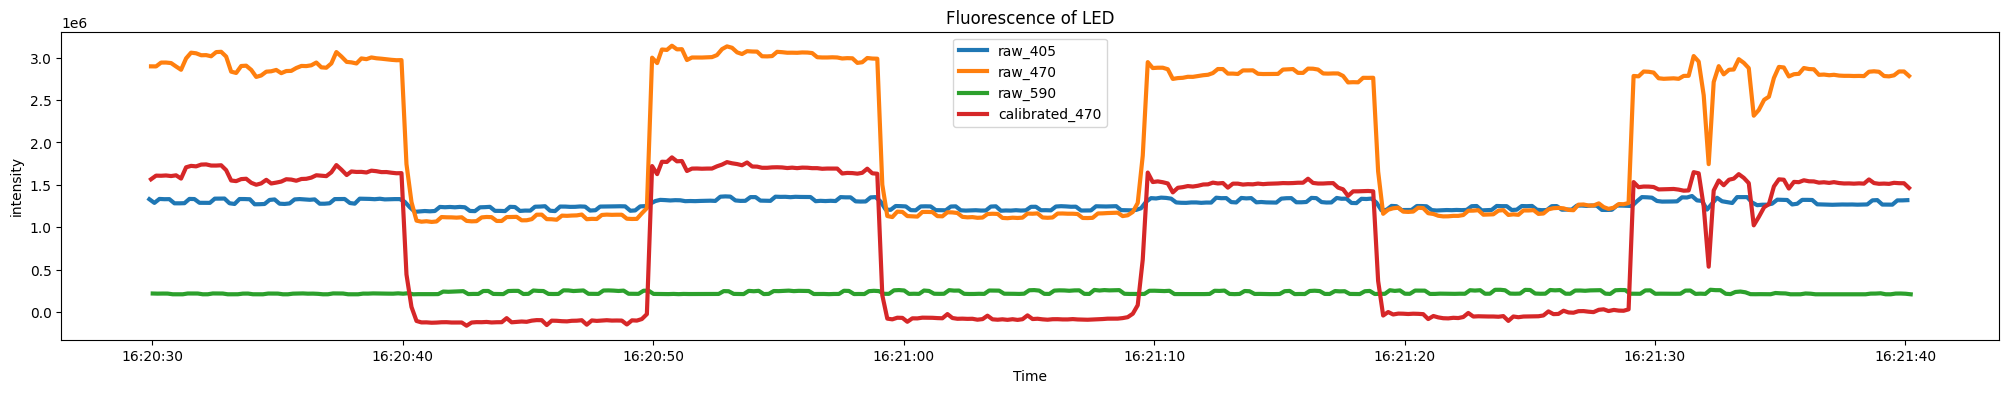

In [14]:
df = data_processing("test6_discreated")
signal_plot(df)

,time_405,time_470,time_590,intensity_405,intensity_470,intensity_590,calibrated_470,normalized_470
80,2023-04-26 16:24:28.576850,2023-04-26 16:24:28.642278,2023-04-26 16:24:28.708682,1143312.0,2689578.0,185364.0,1546266.0,0.570744
81,2023-04-26 16:24:28.776066,2023-04-26 16:24:28.845401,2023-04-26 16:24:28.909853,1145694.0,2711979.0,185364.0,1566285.0,0.602657
82,2023-04-26 16:24:28.980164,2023-04-26 16:24:29.042665,2023-04-26 16:24:29.109071,1190367.0,2785869.0,198132.0,1595502.0,0.649234
83,2023-04-26 16:24:29.176452,2023-04-26 16:24:29.242856,2023-04-26 16:24:29.309263,1191762.0,2787399.0,194004.0,1595637.0,0.649449
84,2023-04-26 16:24:29.376646,2023-04-26 16:24:29.442071,2023-04-26 16:24:29.508477,1184205.0,2183397.0,185364.0,999192.0,-0.301372
85,2023-04-26 16:24:29.575860,2023-04-26 16:24:29.647149,2023-04-26 16:24:29.719410,1052118.0,1074801.0,185556.0,22683.0,-1.85807
86,2023-04-26 16:24:29.778982,2023-04-26 16:24:29.843435,2023-04-26 16:24:29.909840,1052658.0,1304343.0,185364.0,251685.0,-1.493007
87,2023-04-26 16:24:29.977224,2023-04-26 16:24:30.042657,2023-04-26 16:24:30.109056,1125204.0,2574240.0,185364.0,1449036.0,0.415745
88,2023-04-26 16:24:30.175459,2023-04-26 16:24:30.243819,2023-04-26 16:24:30.312177,1126452.0,2542371.0,185556.0,1415919.0,0.362952
89,2023-04-26 16:24:30.375656,2023-04-26 16:24:30.443036,2023-04-26 16:24:30.508463,1124121.0,2509332.0,185364.0,1385211.0,0.313999


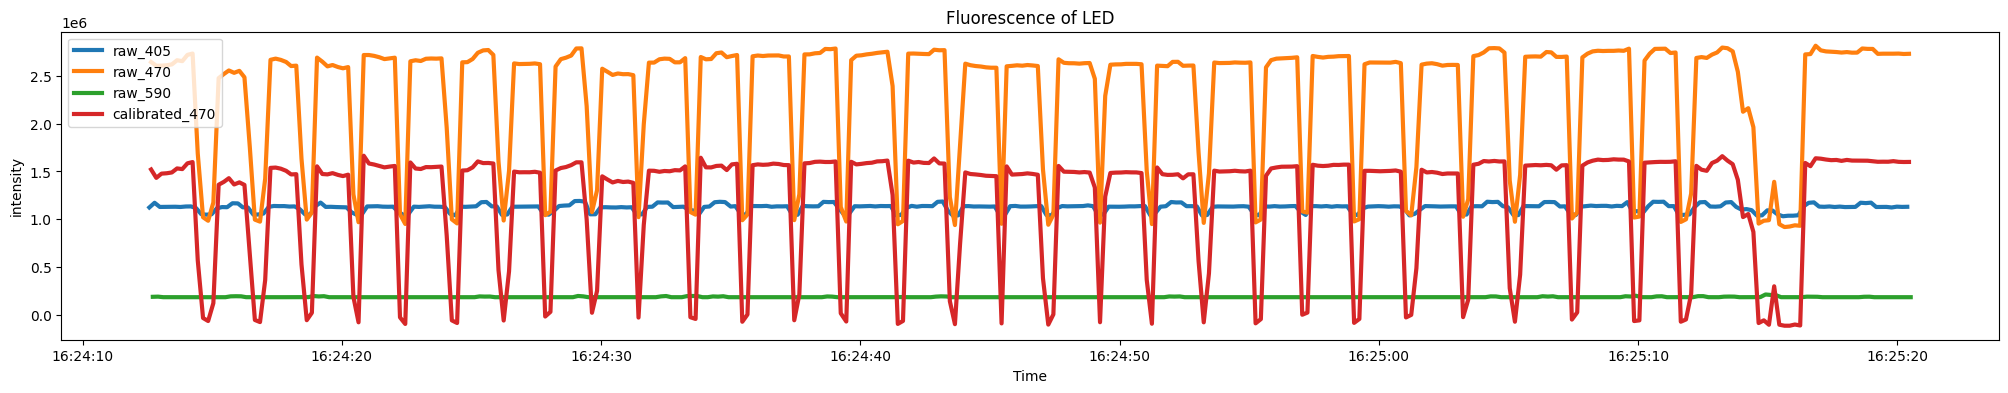

In [15]:
df = data_processing("test7_discreated")
signal_plot(df)

,time_405,time_470,time_590,intensity_405,intensity_470,intensity_590,calibrated_470,normalized_470
80,2023-04-26 16:27:56.498154,2023-04-26 16:27:56.577255,2023-04-26 16:27:56.633896,1147587.0,2392173.0,192696.0,1244586.0,0.114836
81,2023-04-26 16:27:56.700302,2023-04-26 16:27:56.766707,2023-04-26 16:27:56.832134,1145973.0,1822308.0,192696.0,676335.0,-0.739668
82,2023-04-26 16:27:56.898542,2023-04-26 16:27:56.964945,2023-04-26 16:27:57.032329,1122015.0,1083474.0,199800.0,-38541.0,-1.814659
83,2023-04-26 16:27:57.098734,2023-04-26 16:27:57.165138,2023-04-26 16:27:57.232520,1119576.0,1045953.0,199032.0,-73623.0,-1.867413
84,2023-04-26 16:27:57.299902,2023-04-26 16:27:57.375098,2023-04-26 16:27:57.436622,1116939.0,1088958.0,193080.0,-27981.0,-1.798779
85,2023-04-26 16:27:57.519628,2023-04-26 16:27:57.565526,2023-04-26 16:27:57.631929,1092744.0,1758459.0,192696.0,665715.0,-0.755638
86,2023-04-26 16:27:57.699316,2023-04-26 16:27:57.764742,2023-04-26 16:27:57.831148,1176447.0,2828223.0,192696.0,1651776.0,0.727146
87,2023-04-26 16:27:57.898529,2023-04-26 16:27:57.965913,2023-04-26 16:27:58.032316,1180506.0,2898762.0,196152.0,1718256.0,0.827115
88,2023-04-26 16:27:58.098721,2023-04-26 16:27:58.166104,2023-04-26 16:27:58.231532,1225539.0,2900031.0,195576.0,1674492.0,0.761305
89,2023-04-26 16:27:58.297937,2023-04-26 16:27:58.364341,2023-04-26 16:27:58.430748,1229913.0,2902482.0,198456.0,1672569.0,0.758413


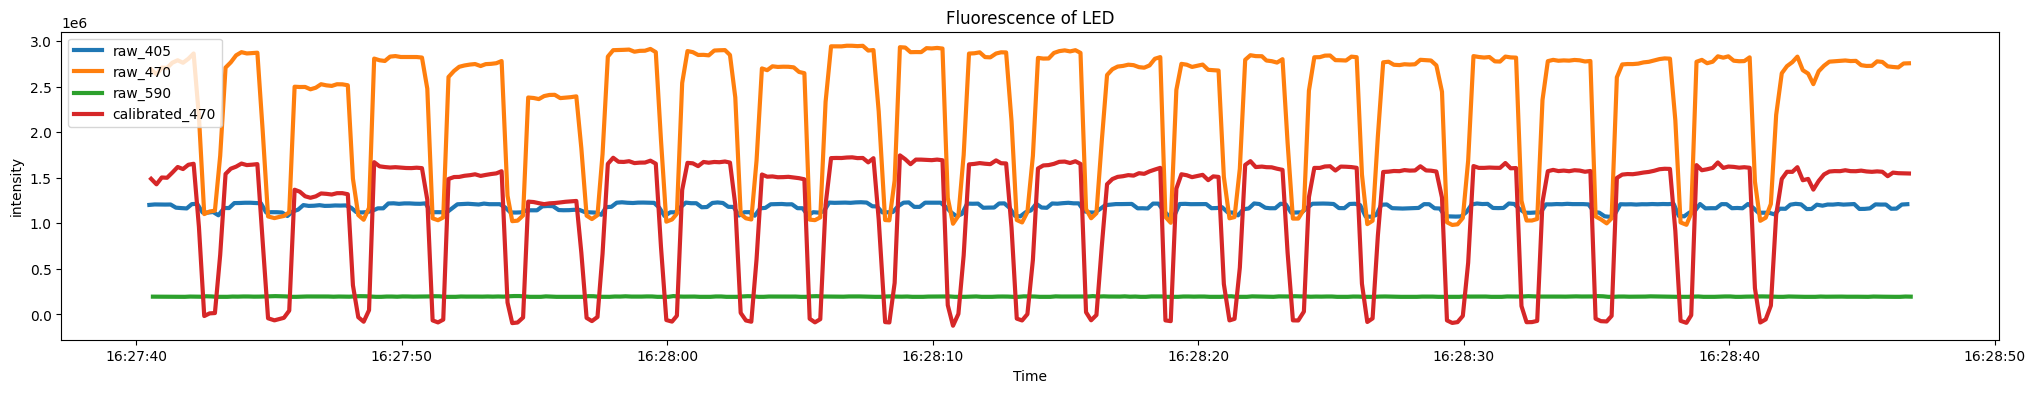

In [16]:
df = data_processing("test8_discreated")
signal_plot(df)

#### Yellow

,time_405,time_470,time_590,intensity_405,intensity_470,intensity_590,calibrated_470,normalized_470
80,2023-05-12 18:54:41.581230,2023-05-12 18:54:41.647636,2023-05-12 18:54:41.715018,921447.0,1714932.0,156120.0,793485.0,-1.459457
81,2023-05-12 18:54:41.781424,2023-05-12 18:54:41.852712,2023-05-12 18:54:41.915211,921231.0,1716249.0,156696.0,795018.0,-1.370636
82,2023-05-12 18:54:41.981615,2023-05-12 18:54:42.047047,2023-05-12 18:54:42.114429,881631.0,1675953.0,154200.0,794322.0,-1.410962
83,2023-05-12 18:54:42.180833,2023-05-12 18:54:42.246260,2023-05-12 18:54:42.315596,880884.0,1676706.0,154200.0,795822.0,-1.324053
84,2023-05-12 18:54:42.382978,2023-05-12 18:54:42.458174,2023-05-12 18:54:42.518719,880110.0,1679838.0,156504.0,799728.0,-1.09774
85,2023-05-12 18:54:42.585125,2023-05-12 18:54:42.650554,2023-05-12 18:54:42.715985,920430.0,1717395.0,155736.0,796965.0,-1.257828
86,2023-05-12 18:54:42.784342,2023-05-12 18:54:42.866370,2023-05-12 18:54:42.928871,921063.0,1720335.0,156504.0,799272.0,-1.124161
87,2023-05-12 18:54:42.980630,2023-05-12 18:54:43.047033,2023-05-12 18:54:43.117344,921780.0,1681017.0,154200.0,759237.0,-3.443773
88,2023-05-12 18:54:43.180821,2023-05-12 18:54:43.247226,2023-05-12 18:54:43.314609,880647.0,1681071.0,154200.0,800424.0,-1.057414
89,2023-05-12 18:54:43.380038,2023-05-12 18:54:43.447419,2023-05-12 18:54:43.513826,875745.0,1678818.0,154392.0,803073.0,-0.903932


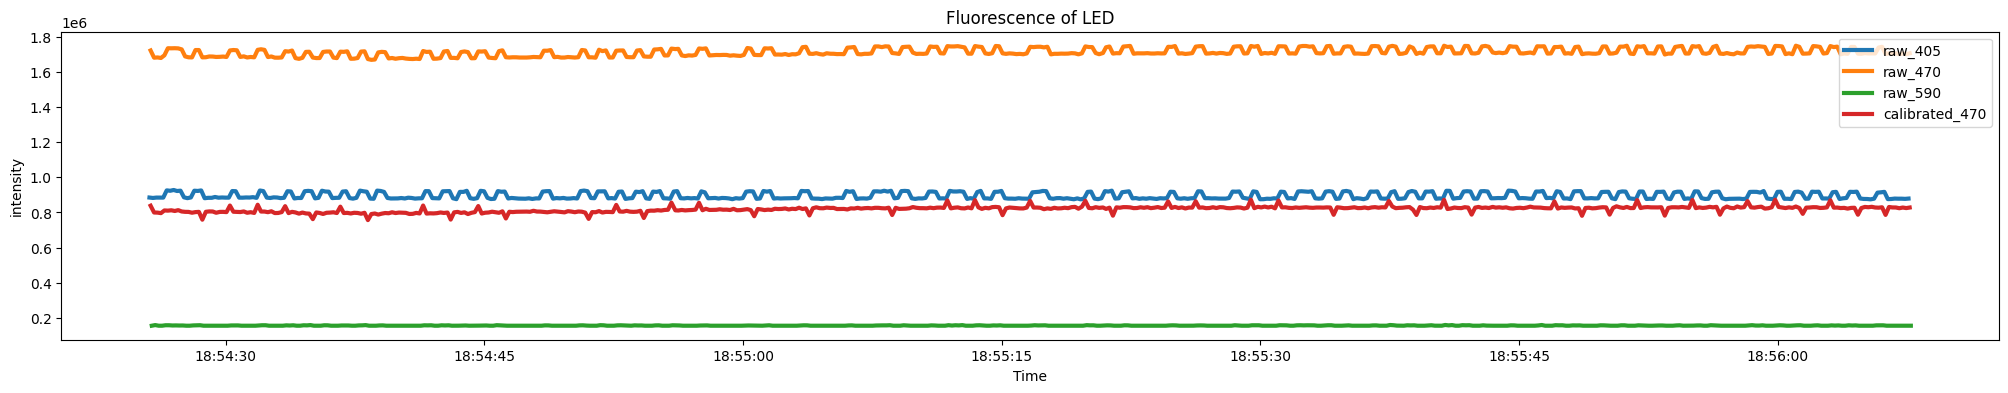

In [5]:
df = data_processing("test10_c")
signal_plot(df)

,time_405,time_470,time_590,intensity_405,intensity_470,intensity_590,calibrated_470,normalized_470
80,2023-05-12 18:50:14.495127,2023-05-12 18:50:14.561531,2023-05-12 18:50:14.628914,753294.0,1450692.0,132306.0,697398.0,0.393689
81,2023-05-12 18:50:14.696296,2023-05-12 18:50:14.761724,2023-05-12 18:50:14.828129,754182.0,1441692.0,133308.0,687510.0,0.351657
82,2023-05-12 18:50:14.895517,2023-05-12 18:50:14.962895,2023-05-12 18:50:15.030277,716775.0,1411014.0,128466.0,694239.0,0.380261
83,2023-05-12 18:50:15.094729,2023-05-12 18:50:15.163091,2023-05-12 18:50:15.230961,718407.0,1414272.0,128466.0,695865.0,0.387172
84,2023-05-12 18:50:15.301273,2023-05-12 18:50:15.362795,2023-05-12 18:50:15.429201,716652.0,1412325.0,128466.0,695673.0,0.386356
85,2023-05-12 18:50:15.496584,2023-05-12 18:50:15.562986,2023-05-12 18:50:15.628417,722178.0,1413789.0,128466.0,691611.0,0.36909
86,2023-05-12 18:50:15.695798,2023-05-12 18:50:15.761226,2023-05-12 18:50:15.831538,717861.0,1401174.0,128466.0,683313.0,0.333817
87,2023-05-12 18:50:15.899897,2023-05-12 18:50:15.963373,2023-05-12 18:50:16.030757,716199.0,1450893.0,134994.0,734694.0,0.552224
88,2023-05-12 18:50:16.098138,2023-05-12 18:50:16.163570,2023-05-12 18:50:16.228997,751914.0,1449411.0,134226.0,697497.0,0.39411
89,2023-05-12 18:50:16.295401,2023-05-12 18:50:16.361807,2023-05-12 18:50:16.429188,755208.0,1451883.0,134040.0,696675.0,0.390615


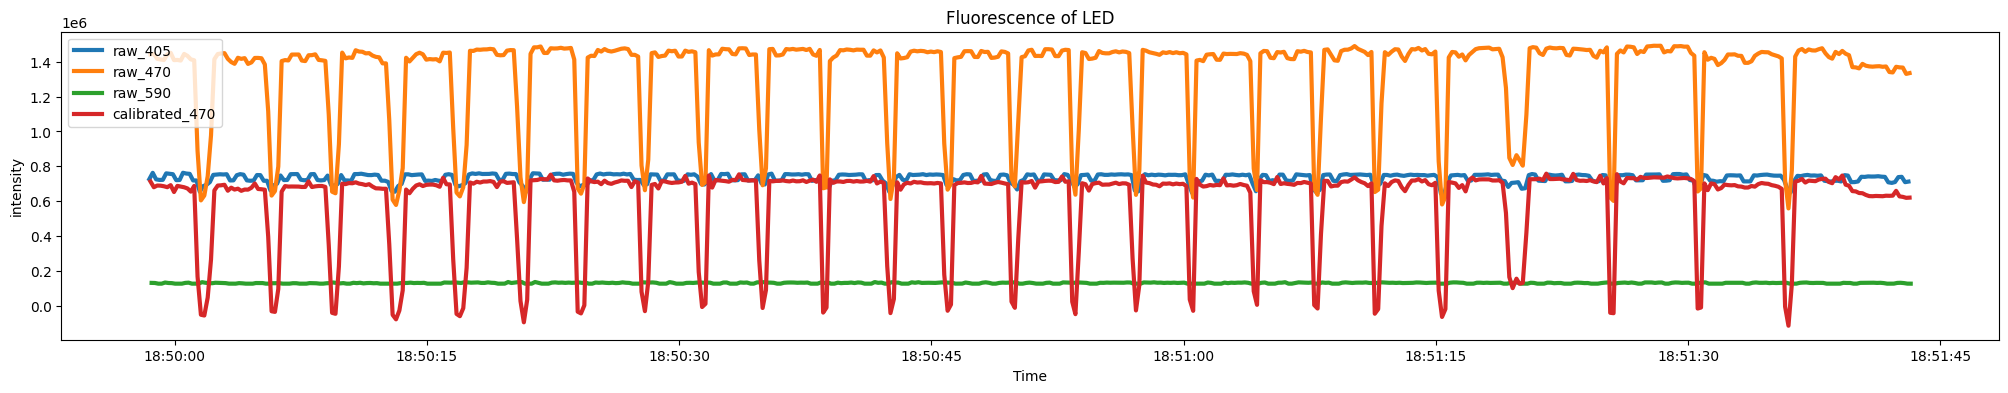

In [6]:
df = data_processing("test11_t")
signal_plot(df)

#### Dark purple

,time_405,time_470,time_590,intensity_405,intensity_470,intensity_590,calibrated_470,normalized_470
80,2023-05-12 19:04:34.603815,2023-05-12 19:04:34.670221,2023-05-12 19:04:34.736626,955059.0,841752.0,178536.0,-113307.0,-0.43399
81,2023-05-12 19:04:34.803032,2023-05-12 19:04:34.870415,2023-05-12 19:04:34.936819,946992.0,840840.0,178536.0,-106152.0,0.054034
82,2023-05-12 19:04:35.003225,2023-05-12 19:04:35.069629,2023-05-12 19:04:35.138968,898578.0,793260.0,176616.0,-105318.0,0.110919
83,2023-05-12 19:04:35.205372,2023-05-12 19:04:35.270800,2023-05-12 19:04:35.348924,898371.0,794949.0,176616.0,-103422.0,0.24024
84,2023-05-12 19:04:35.403612,2023-05-12 19:04:35.471975,2023-05-12 19:04:35.537401,900852.0,789984.0,178920.0,-110868.0,-0.267632
85,2023-05-12 19:04:35.604782,2023-05-12 19:04:35.671187,2023-05-12 19:04:35.737594,948756.0,839523.0,178728.0,-109233.0,-0.156113
86,2023-05-12 19:04:35.804976,2023-05-12 19:04:35.871382,2023-05-12 19:04:35.936809,945921.0,840711.0,177960.0,-105210.0,0.118285
87,2023-05-12 19:04:36.006145,2023-05-12 19:04:36.070599,2023-05-12 19:04:36.138956,947421.0,790602.0,176616.0,-156819.0,-3.401829
88,2023-05-12 19:04:36.204387,2023-05-12 19:04:36.270791,2023-05-12 19:04:36.337197,897372.0,793176.0,176616.0,-104196.0,0.187447
89,2023-05-12 19:04:36.404578,2023-05-12 19:04:36.470983,2023-05-12 19:04:36.537390,898944.0,787773.0,176616.0,-111171.0,-0.288299


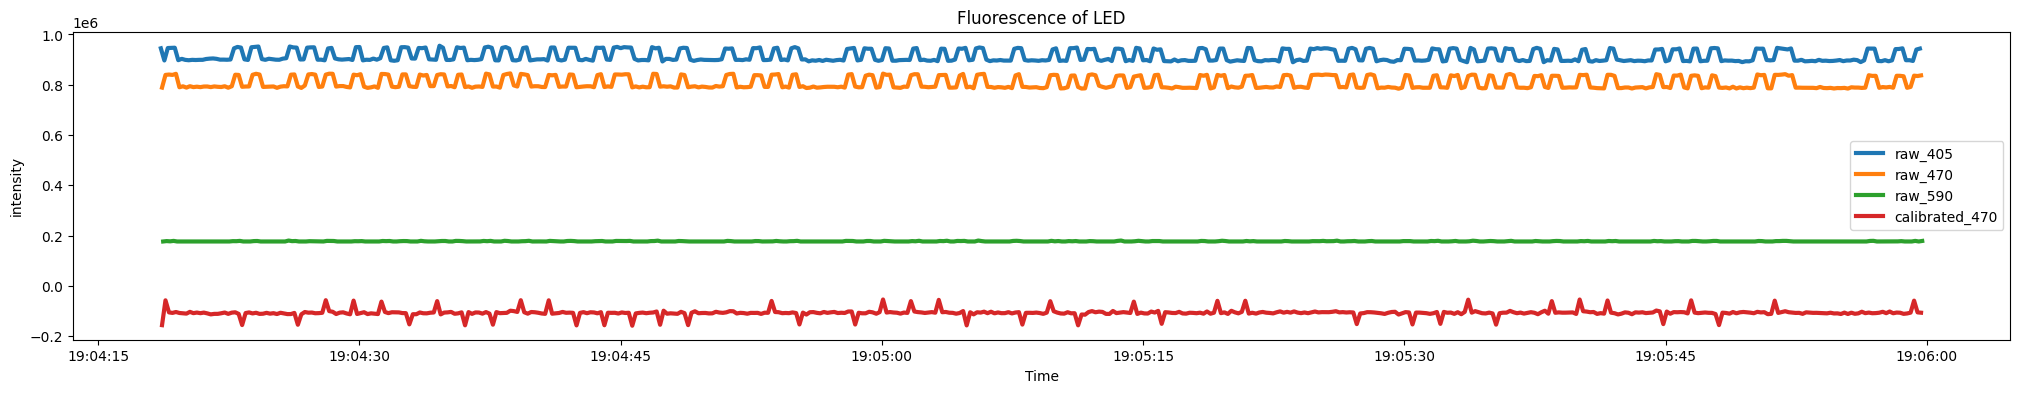

In [7]:
df = data_processing("test12_c")
signal_plot(df)

,time_405,time_470,time_590,intensity_405,intensity_470,intensity_590,calibrated_470,normalized_470
80,2023-05-12 19:00:28.455535,2023-05-12 19:00:28.521940,2023-05-12 19:00:28.588345,882108.0,774582.0,165972.0,-107526.0,-0.490076
81,2023-05-12 19:00:28.654750,2023-05-12 19:00:28.722133,2023-05-12 19:00:28.788539,881898.0,775794.0,165012.0,-106104.0,-0.348038
82,2023-05-12 19:00:28.855919,2023-05-12 19:00:28.924279,2023-05-12 19:00:28.990685,879303.0,781806.0,167412.0,-97497.0,0.511684
83,2023-05-12 19:00:29.070764,2023-05-12 19:00:29.125449,2023-05-12 19:00:29.209434,880266.0,775368.0,166740.0,-104898.0,-0.227575
84,2023-05-12 19:00:29.292441,2023-05-12 19:00:29.337362,2023-05-12 19:00:29.400839,883491.0,777720.0,165300.0,-105771.0,-0.314776
85,2023-05-12 19:00:29.465290,2023-05-12 19:00:29.560992,2023-05-12 19:00:29.590287,879183.0,780651.0,166260.0,-98532.0,0.408302
86,2023-05-12 19:00:29.661576,2023-05-12 19:00:29.737749,2023-05-12 19:00:29.791458,883056.0,779298.0,166932.0,-103758.0,-0.113705
87,2023-05-12 19:00:29.865677,2023-05-12 19:00:29.930130,2023-05-12 19:00:29.996536,881547.0,779697.0,165588.0,-101850.0,0.076879
88,2023-05-12 19:00:30.061963,2023-05-12 19:00:30.123485,2023-05-12 19:00:30.188913,881880.0,776991.0,165204.0,-104889.0,-0.226676
89,2023-05-12 19:00:30.255320,2023-05-12 19:00:30.322703,2023-05-12 19:00:30.388129,881184.0,777999.0,165780.0,-103185.0,-0.05647


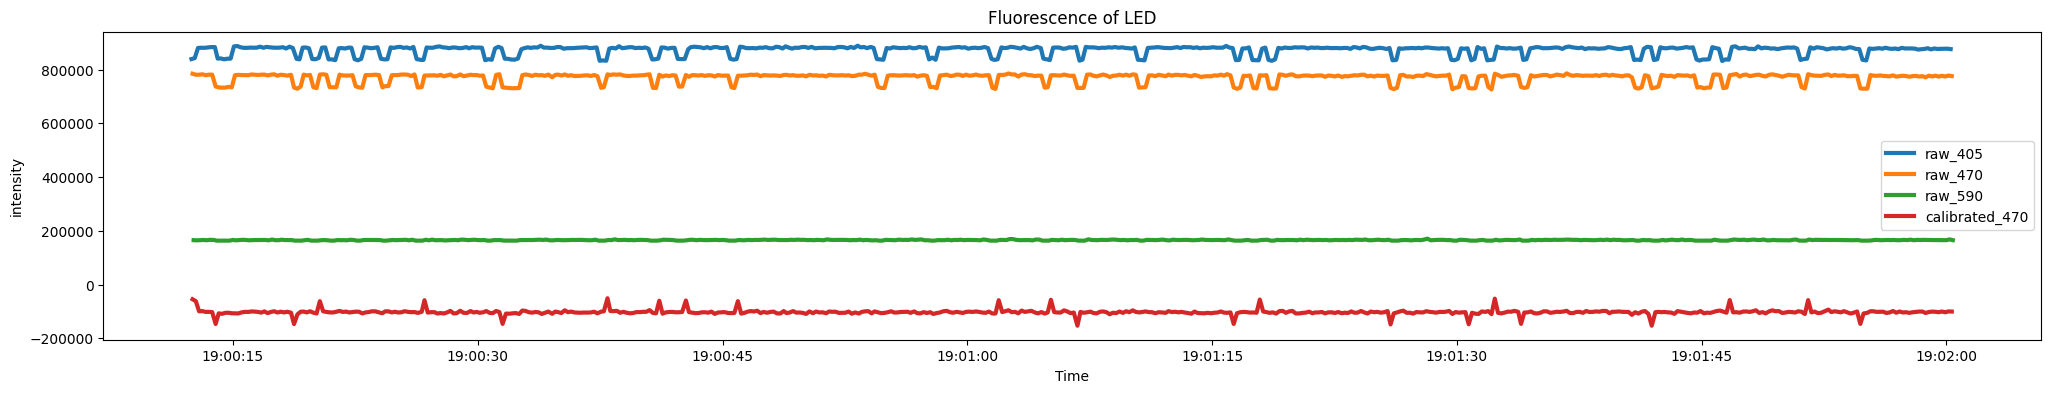

In [8]:
df = data_processing("test13_t")
signal_plot(df)